# NY TAXI DATA SCIENCE EXCERCISE

### Basic Questions:

1. What are the distributions of the number of passengers per trip, payment type, fare amount, tip amount, and total amount?

2. What are top 5 busiest hours of the day, and the top 10 busiest locations of the city?

3. What is the hourly taxi activity for each day of the week?

4. Which trip has the most consistent fares?


### Open Questions:


1. Can you predict the fare and tip amount based on the pickup / drop off location, time, and day of the week?

2. Can you predict the pickup / drop off geographical distribution for each hour of a weekday?

3. If you were a taxi owner, how would you maximize your earnings in a day?

4. If you run a taxi company, how would you maximize your earnings?

In [19]:
t=2
t

2

In [112]:
import pandas as pd
import numpy as np
import matplotlib  
import matplotlib.pyplot as plt 
import numpy as np
import plotly.plotly as py
from plotly.offline import init_notebook_mode, iplot, plot
import plotly.graph_objs as go
from plotly import tools

df_big = pd.read_csv('yellow_tripdata_2016-01.csv')
#df_big_clean=df_big.fillna(df_big.mean())#df_big.dropna(axis=1)
df_big_clean=df_big
#df_big_clean <- df_big[!(is.na(df$start_pc) | df$start_pc==""), ] #| is an or-operator and ! inverts. 
#Hence, the command above displays all rows, which are not b) NA or b) equal to ""
df=df_big_clean.loc[0:100,:]  #use reduces data points for testing mode
print(df_big.shape)
print(df_big_clean.shape)
df

(2389990, 19)
(2389990, 19)


In [25]:
#basic Histograms
#extract number of people per trip
peps_per_trip_df=df.loc[:, df.columns.str.match('passenger_count')]
peps_per_trip_df.shape
print(type(peps_per_trip_df))
peps_per_trip=df.loc[:, df.columns.str.match('passenger_count')].values
print(type(peps_per_trip))

#extract fares by payment type
fare_paymenttype1=df.loc[df['payment_type'] == 1, 'fare_amount'].values
fare_paymenttype2=df.loc[df['payment_type'] == 2, 'fare_amount'].values
fare_paymenttype4=df.loc[df['payment_type'] == 4, 'fare_amount'].values
type(fare_paymenttype1)
#1=cc, 2=cash, 3=no charge, 4=dispute, 5=unknown, 6=voided trip
#rate code ID (final rate code at end of the trip): 1=standard rate, 2=JFK, 3=Newark, 5=Nassau or Westchester, 5=Negotiated fare, 6=Group ride

<class 'pandas.core.frame.DataFrame'>
<class 'numpy.ndarray'>


numpy.ndarray

In [69]:
import numpy as np
import plotly.plotly as py
from plotly.offline import init_notebook_mode, iplot, plot
import plotly.graph_objs as go

layout=go.Layout(title="First Plot", xaxis={'title':'x1'}, yaxis={'title':'x2'})
data = [go.Histogram(x=peps_per_trip)]  #or [dataset1, darset2]
layout = go.Layout(
    title='Histogram of Passenger numbers',
    xaxis=dict(
        title='passenger number'
    ),
    yaxis=dict(
        title='Count'
    ),
    bargap=0.2,
    bargroupgap=0.1
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig,  filename='People_per_trip_histogram')
#py.iplot(data,  filename='People_per_trip_histogram')

In [87]:
# Distribution: Payment by type

# Add histogram data
fare_paymenttype1=df.loc[df['payment_type'] == 1, 'fare_amount'].values #credit card
fare_paymenttype2=df.loc[df['payment_type'] == 2, 'fare_amount'].values #cash
fare_payments=np.append(fare_paymenttype1,fare_paymenttype2)
total_paymentstype1=df.loc[df['payment_type'] == 1, 'total_amount'].values   #fare+tips+tols
total_paymentstype2=df.loc[df['payment_type'] == 2, 'total_amount'].values   #fare+tips+tols
tip_amountstype1=df.loc[df['payment_type'] == 1, 'tip_amount'].values   #fare+tips+tols
total_payments=np.append(total_paymentstype1,total_paymentstype2)


#fare_paymenttype4=df.loc[df['payment_type'] == 4, 'fare_amount'].values #dispute

#print(type(fare_paymenttype2[1:10]))

# Group data together
hist_data = [fare_paymenttype1,fare_paymenttype2]

group_labels = ['Credit card', 'Cash']


# Create distplot with custom bin_size
fig = ff.create_distplot(hist_data, group_labels, bin_size=1.0)
fig.layout.update({'title': 'Distribution of Fares'})
fig.layout.xaxis1.update({'title': '$ amounts'})
# Plot!
py.iplot(fig, filename='Distplot with Multiple Datasets')


In [89]:
# Group data together
hist_data2 = [fare_payments,total_payments,tip_amountstype1]

group_labels2 = ['Time and Distance Fare', 'Total Charge', 'Tip Amount']


# Create distplot with custom bin_size
fig2 = ff.create_distplot(hist_data2, group_labels2, bin_size=0.5)
fig2.layout.update({'title': 'Distribution of NY Taxi Fares'})
fig2.layout.xaxis1.update({'title': '$ amounts'})
# Plot!
py.iplot(fig2, filename='Distplot with Multiple Datasets2')

In [ ]:
# Distribution: example

# Add histogram data
x1 = np.random.randn(200)-2  
x2 = np.random.randn(200)  
x3 = np.random.randn(200)+2  
x4 = np.random.randn(200)+4  

# Group data together
hist_data = [x1, x2, x3, x4]

group_labels = ['Group 1', 'Group 2', 'Group 3', 'Group 4']

# Create distplot with custom bin_size
fig = ff.create_distplot(hist_data, group_labels, bin_size=.2)

# Plot!
py.iplot(fig, filename='Distplot with Multiple Datasets')

In [ ]:
import numpy as np
import plotly.plotly as py
from plotly.offline import init_notebook_mode, iplot, plot
import plotly.figure_factory as ff
import plotly.graph_objs as go

x = np.random.randn(1000)  
hist_data = [x]
group_labels = ['distplot']

fig = ff.create_distplot(hist_data, group_labels)
py.iplot(fig, filename='Basic Distplot')

In [2]:

import plotly.plotly as py
import plotly.graph_objs as go

import numpy as np

x0 = np.random.randn(500)
x1 = np.random.randn(500)+1

trace1 = go.Histogram(
    x=x0,
    opacity=0.75
)
trace2 = go.Histogram(
    x=x1,
    opacity=0.75
)

data = [trace1, trace2]
layout = go.Layout(barmode='overlay')
fig = go.Figure(data=data, layout=layout)

py.iplot(fig, filename='overlaid histogram')

In [ ]:
import plotly.plotly as py
from plotly.graph_objs import *

#isa
import plotly.plotly as py
from plotly.offline import init_notebook_mode, iplot, plot
import plotly.graph_objs as go
from plotly import tools
init_notebook_mode()
trace = []
trace.append(go.Scatter(
   y = st))

fig = go.Figure(data = trace, layout = go.Layout(title = 'All the seizures'))
iplot(fig)

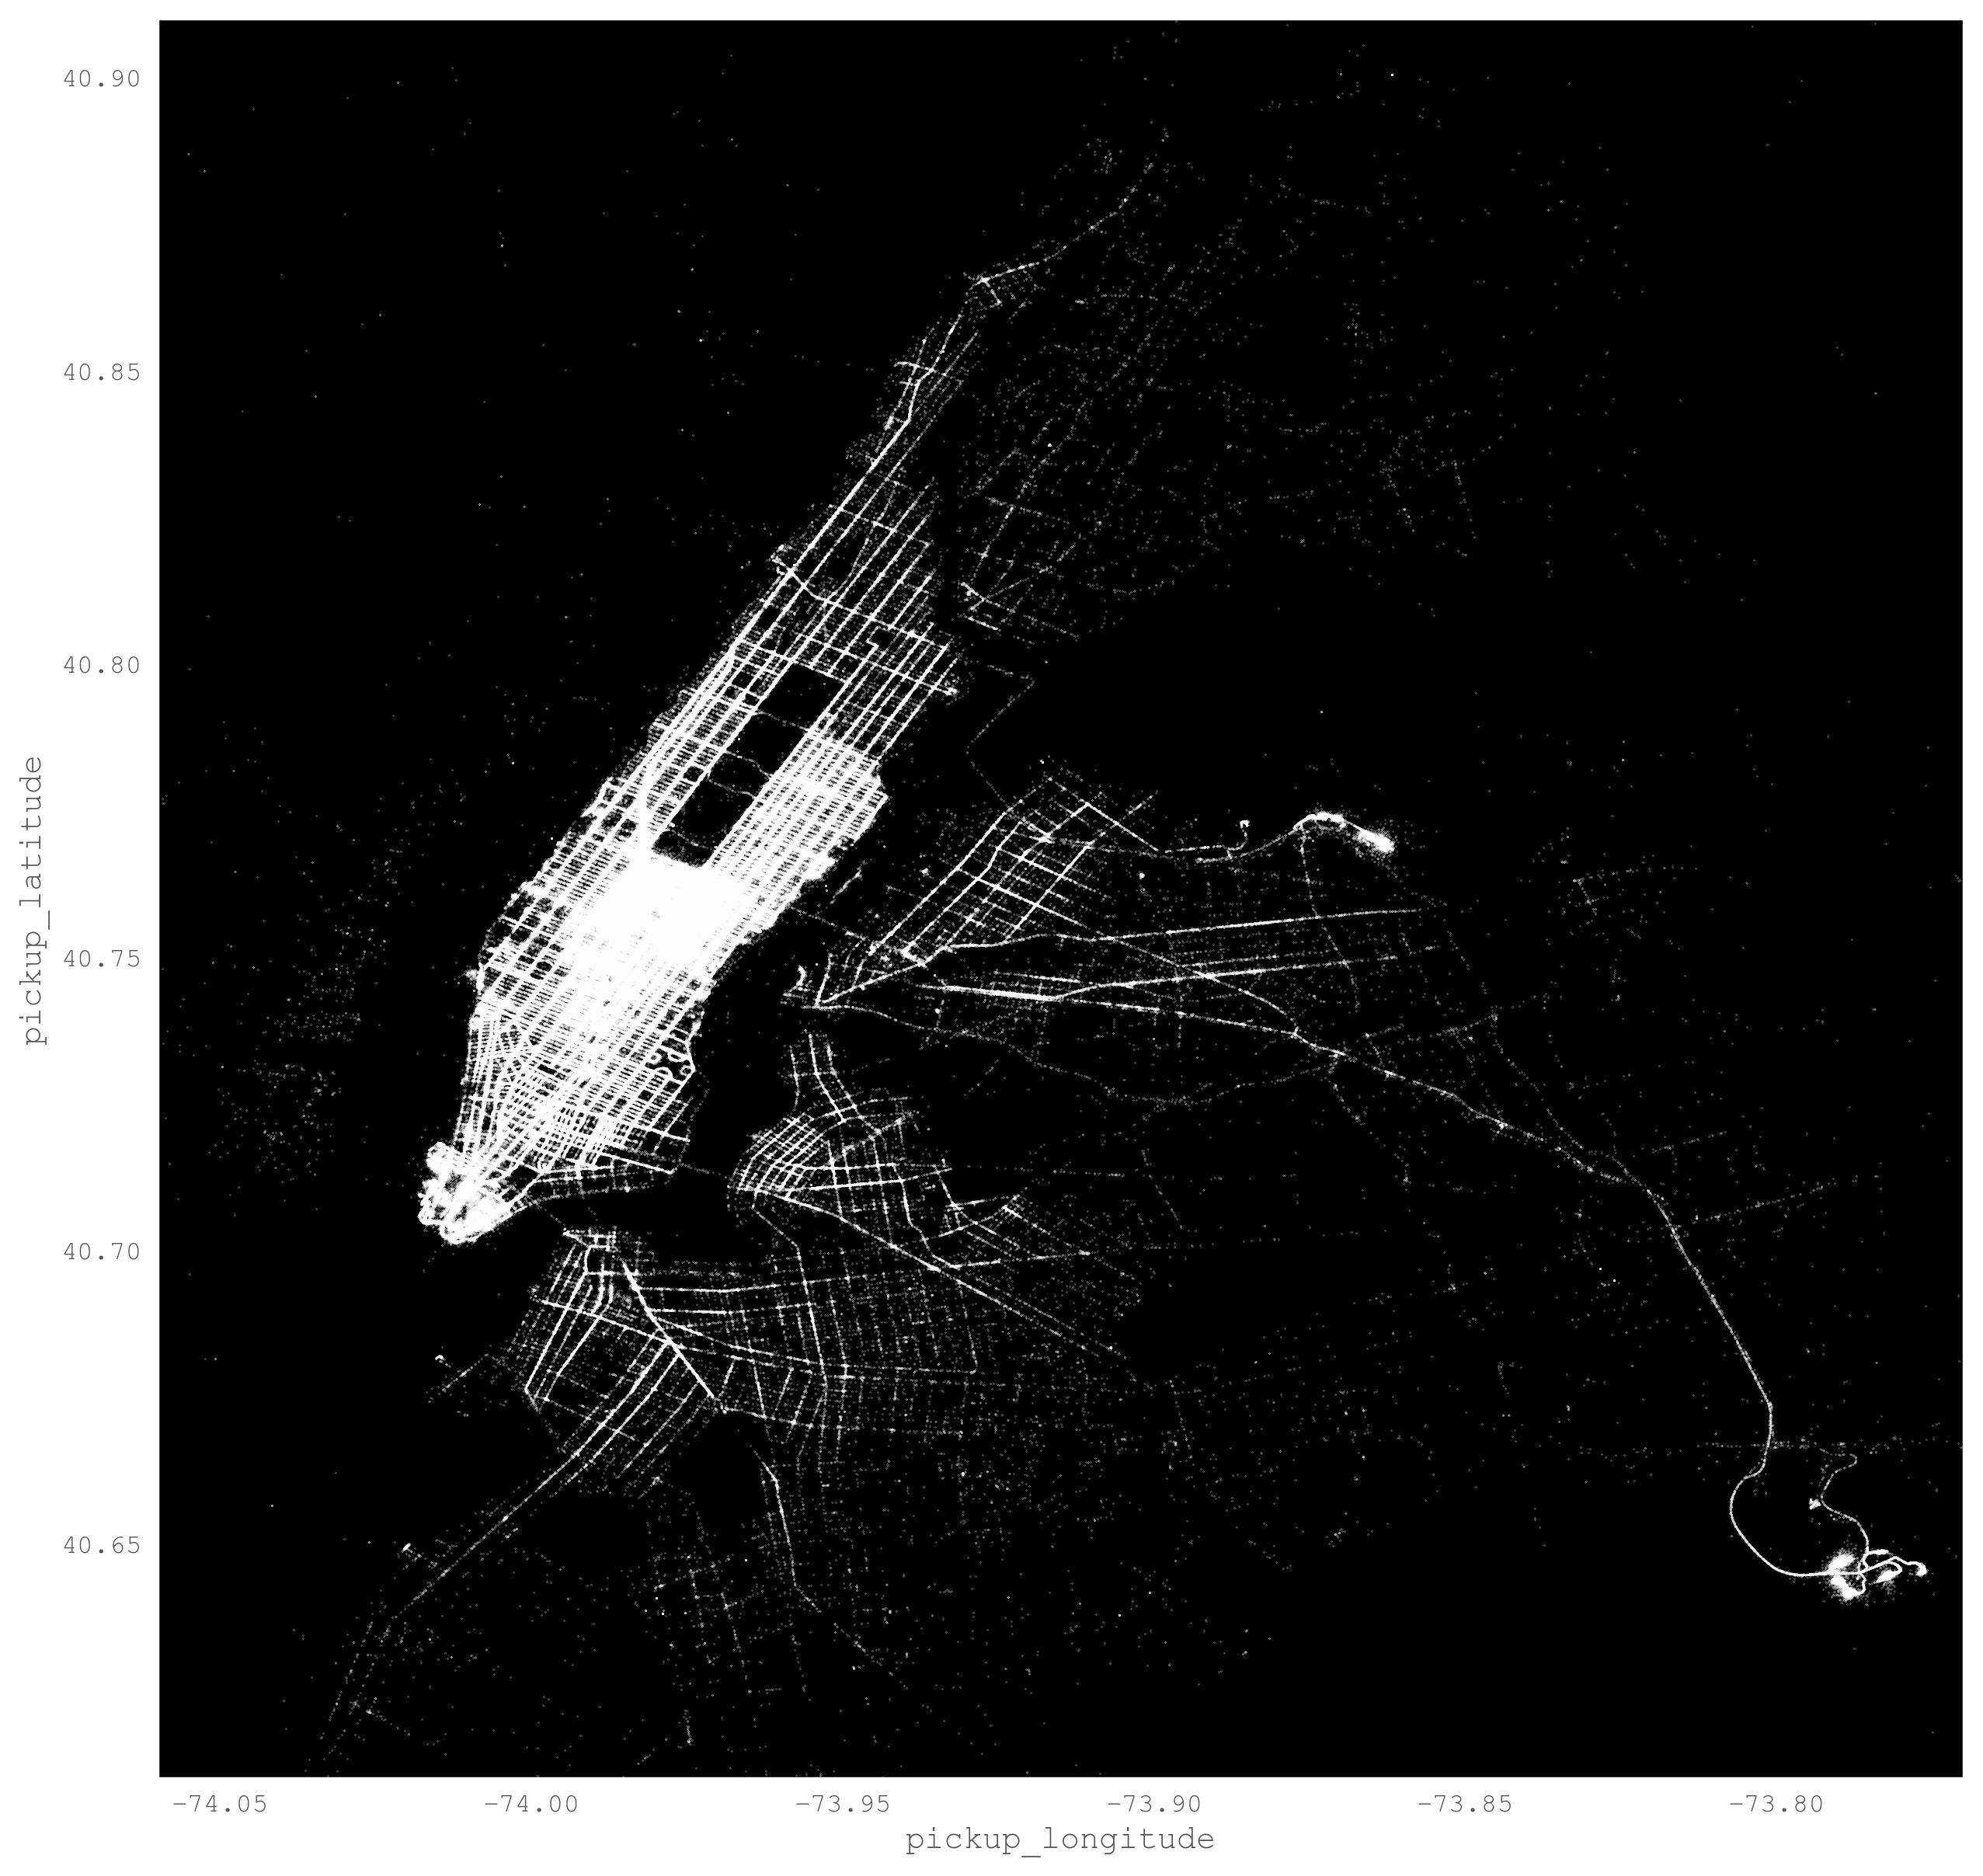

In [77]:
# Map the pick up locations

import matplotlib  
import matplotlib.pyplot as plt 

#pd.options.display.mpl_style = 'default' #Better Styling 
matplotlib.pyplot.style.use('ggplot')

new_style = {'grid': False} #Grid off  
matplotlib.rc('axes', **new_style)  
from matplotlib import rcParams  
rcParams['figure.figsize'] = (12, 12) #Size of figure  
rcParams['figure.dpi'] = 250

P=df.plot(kind='scatter', x='pickup_longitude', y='pickup_latitude',color='white',xlim=(-74.06,-73.77),ylim=(40.61, 40.91),s=.02,alpha=.6)
#P.set_axis_bgcolor('black') #Background Color
P.set_facecolor('black') #Background Colour

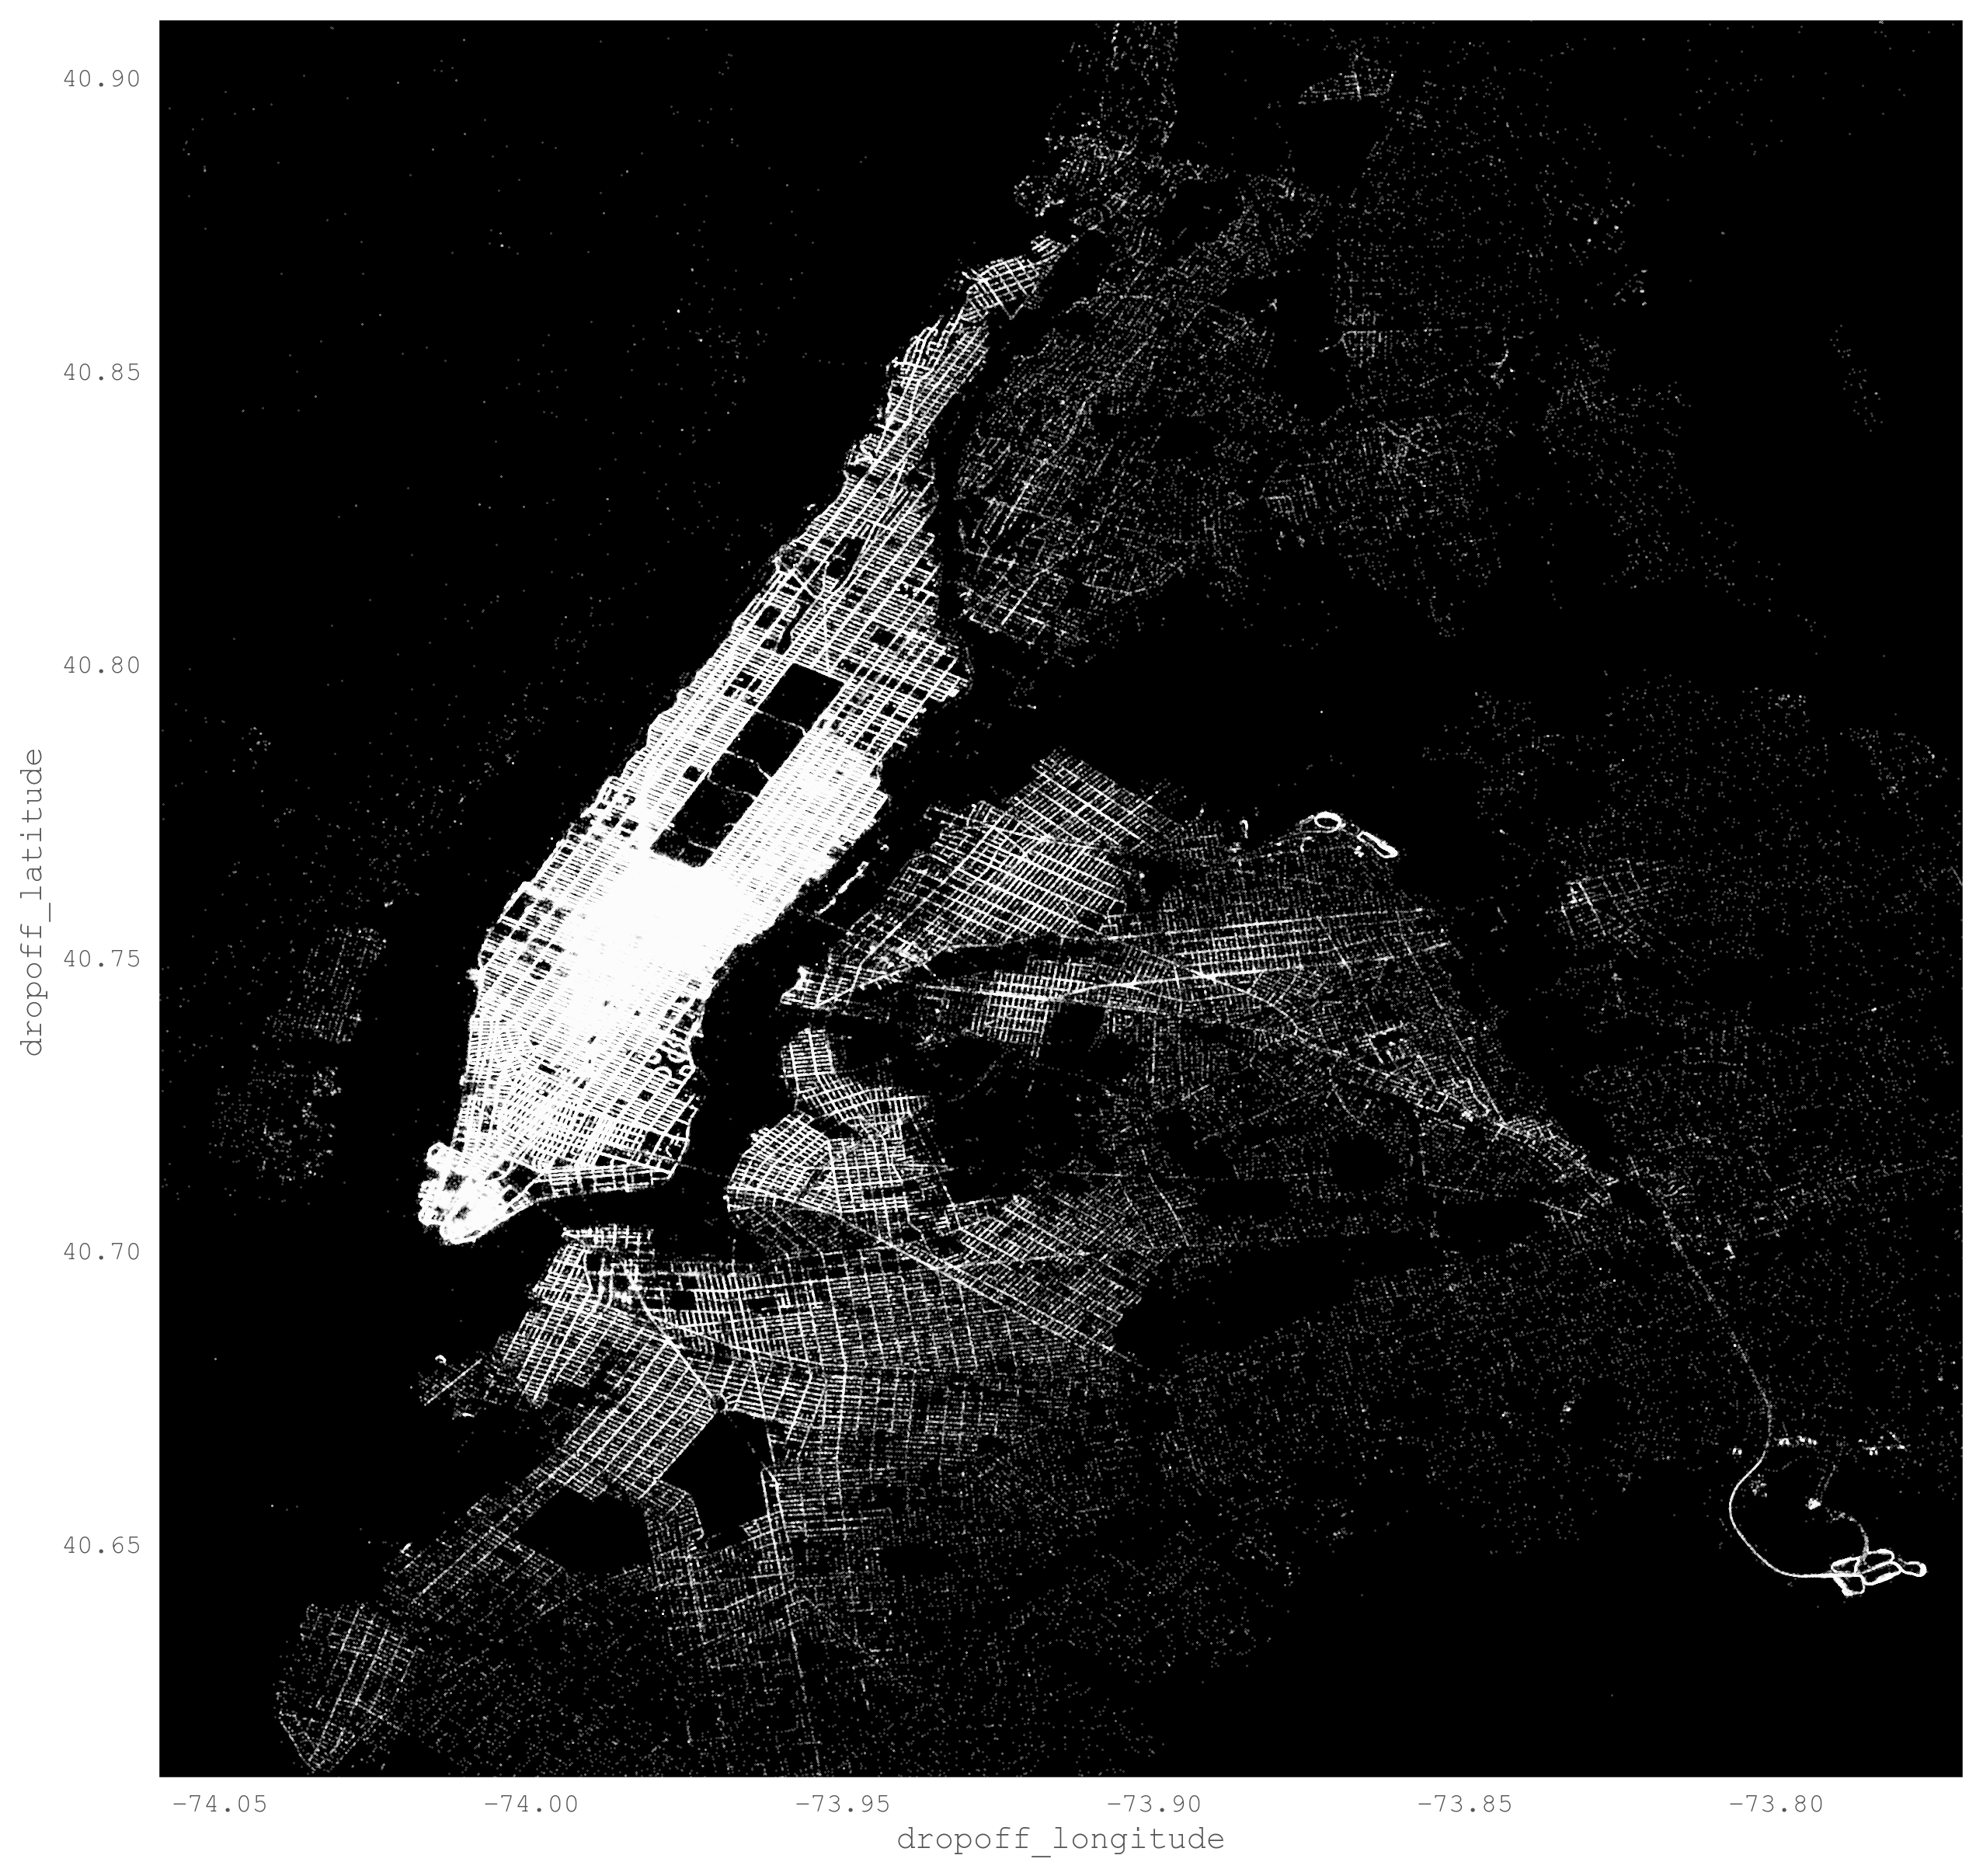

In [79]:
# Map the drop off locations

import matplotlib  
import matplotlib.pyplot as plt 

matplotlib.pyplot.style.use('ggplot')

new_style = {'grid': False} #Grid off  
matplotlib.rc('axes', **new_style)  
from matplotlib import rcParams  
rcParams['figure.figsize'] = (12, 12) #Size of figure  
rcParams['figure.dpi'] = 250

P=df.plot(kind='scatter', x='dropoff_longitude', y='dropoff_latitude',color='white',xlim=(-74.06,-73.77),ylim=(40.61, 40.91),s=.02,alpha=.6)
P.set_facecolor('black') #Background Colour

In [ ]:
#Top 10 busiest locations of the city

#round the lat and long entries 
#Latitude_round=df.loc[df['payment_type'] == 1, 'fare_amount'].values
Latitude_round=np.round(df['pickup_latitude'].values, decimals=1)
Longitude_round=np.round(df['pickup_longitude'].values, decimals=1)
#print(Latitude_round[0:5])
#print(Longitude_round[0:5])

df.loc[:,'GridcodeLat'] = pd.Series(Latitude_round, index=df.index) #add column gridcodes to df
df.loc[:,'GridcodeLon'] = pd.Series(Longitude_round, index=df.index) #add column gridcodes to df

#find 10 locations with most common grid codes
mytable = df.groupby(['GridcodeLat','GridcodeLon']).size()
mytable.sort_values(inplace=True,ascending=False)
totaltrips=mytable.sum()
print('Total trips')
print(totaltrips)
Top10BusyPickupLocations=mytable.head(10)
print(Top10BusyPickupLocations)
print(type(Top10BusyPickupLocations))

Top10BusyPickupLocations=Top10BusyPickupLocations.to_frame()
print(Top10BusyPickupLocations)
print(type(Top10BusyPickupLocations))
#print(mytable.max())
#df.sort('Bytes', ascending=False).head(10)


#sort results by lat and long


#find number of entries for each label
   
    
#df1.loc[:,'f'] = p.Series(np.random.randn(sLength), index=df1.index) #add column f to df1
#plot table or pie chart



KeyError: 'GridcodeLon'

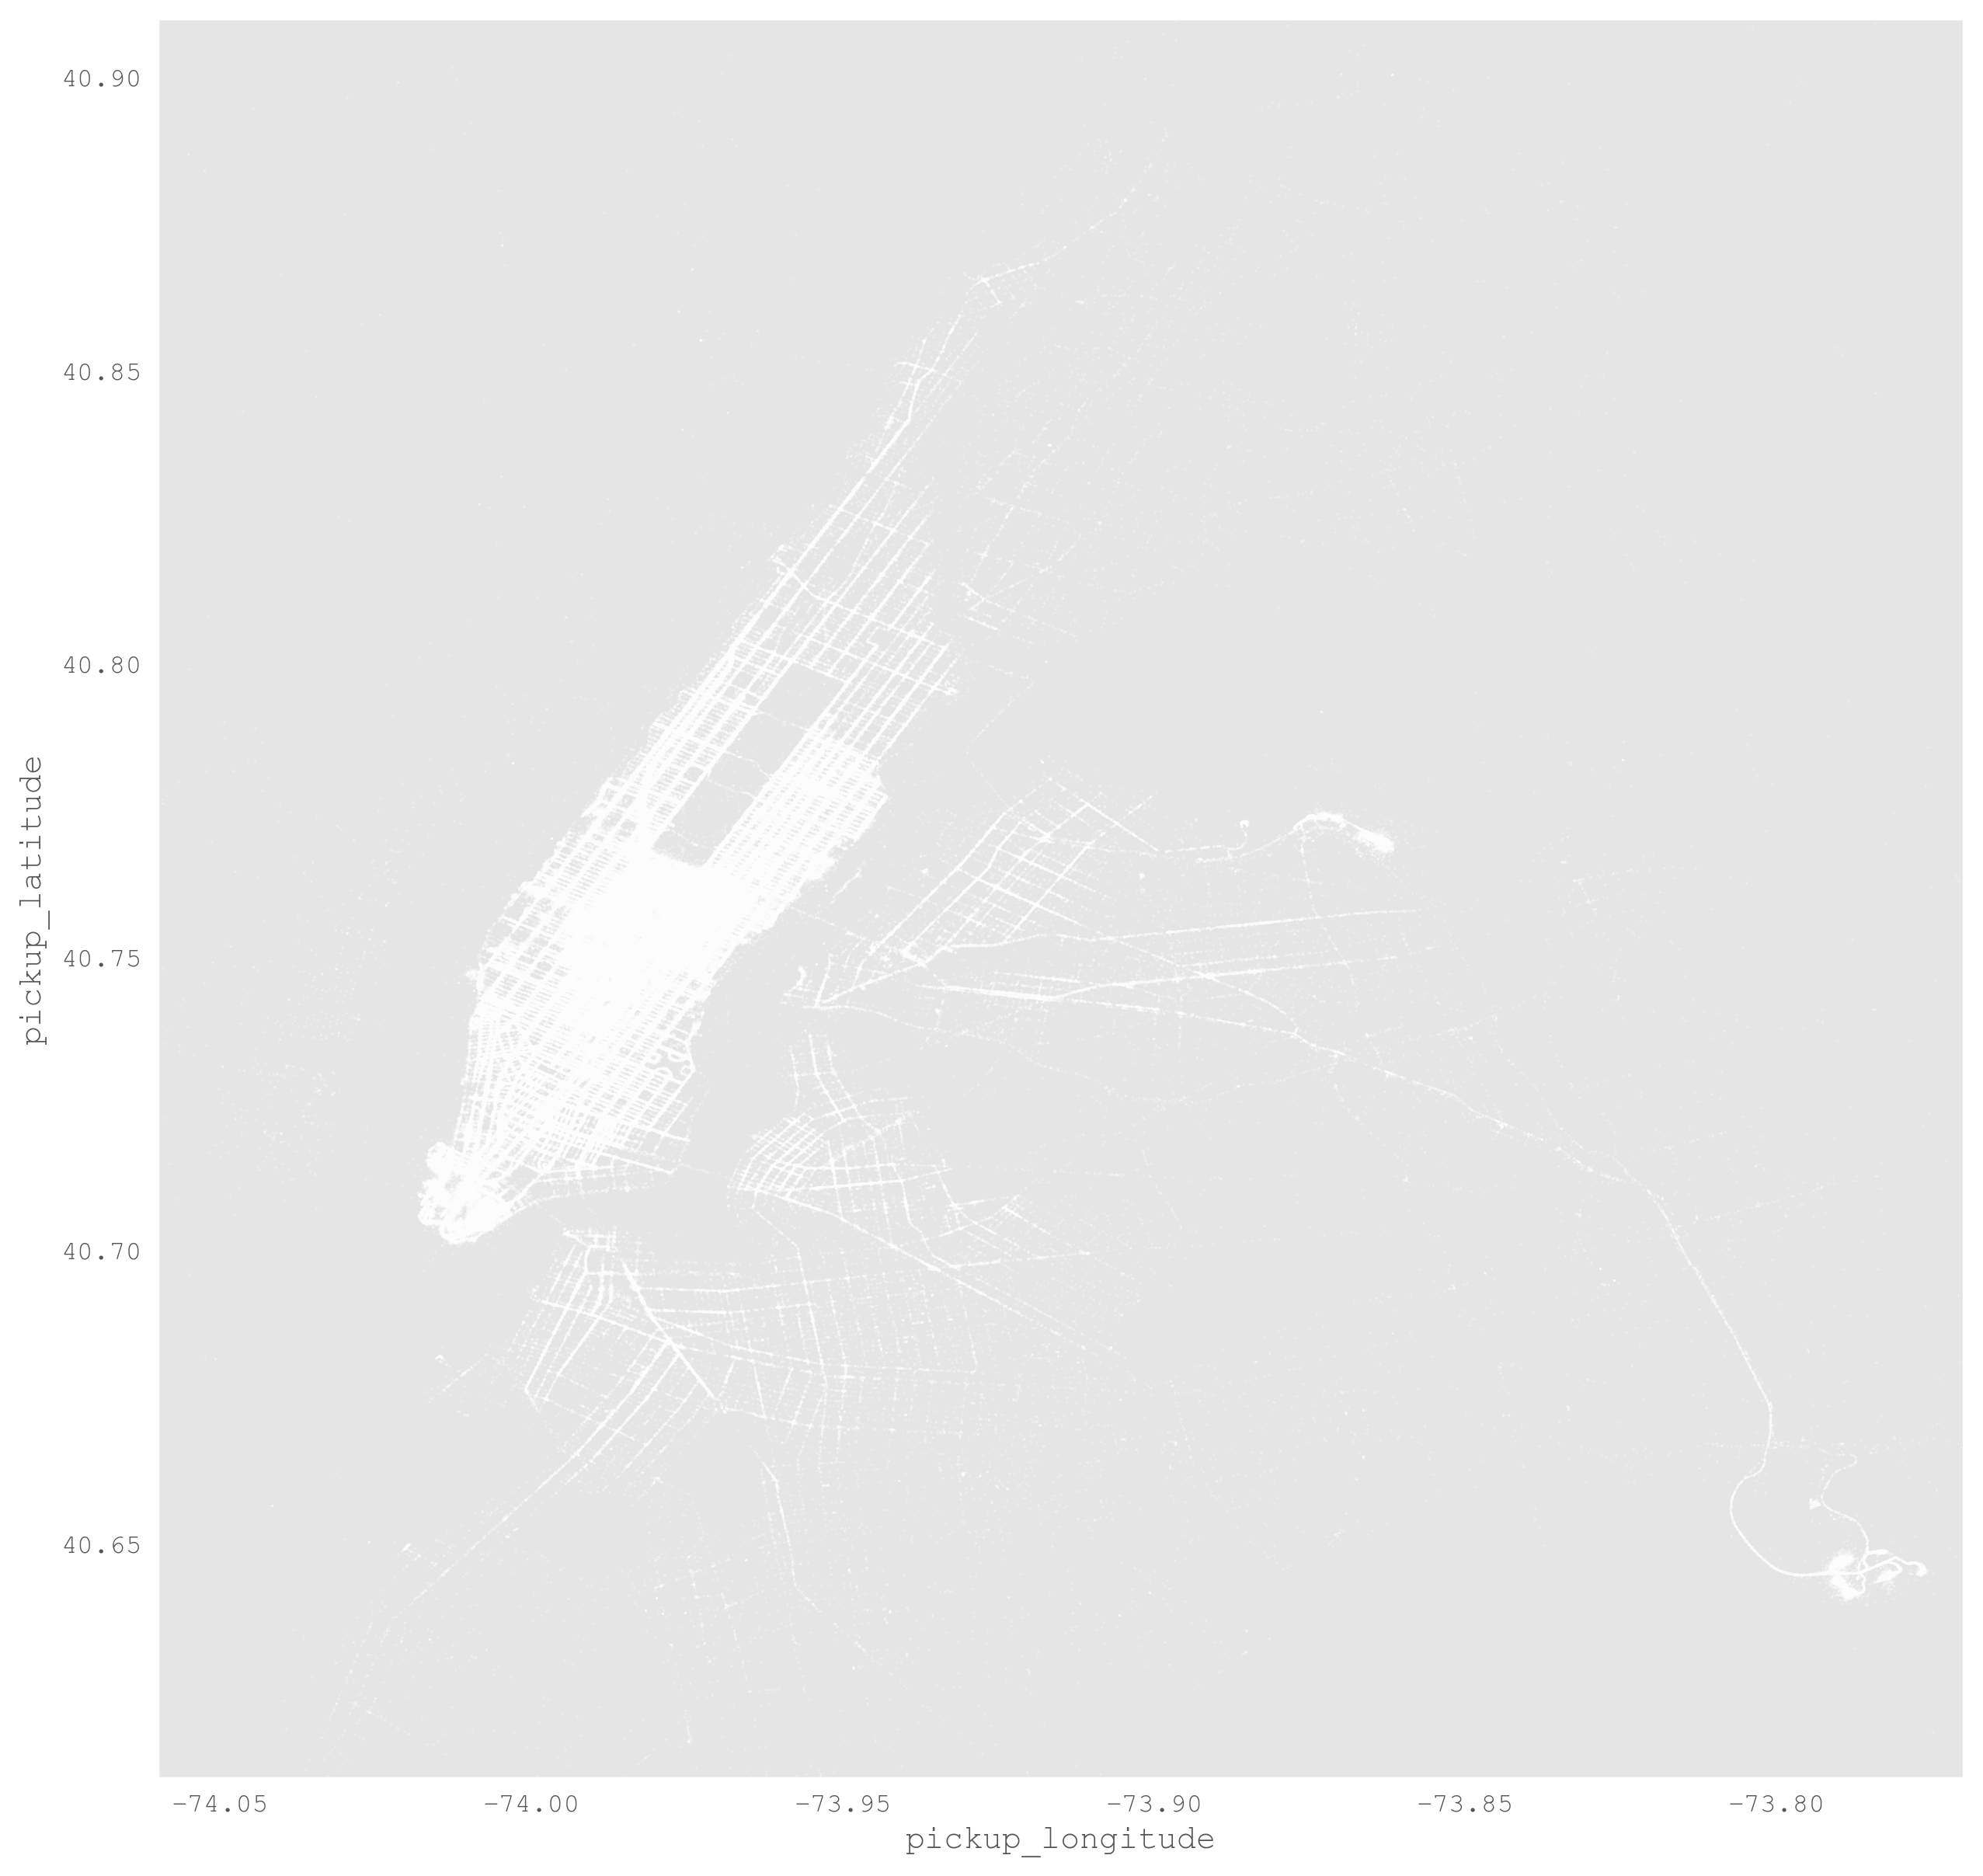

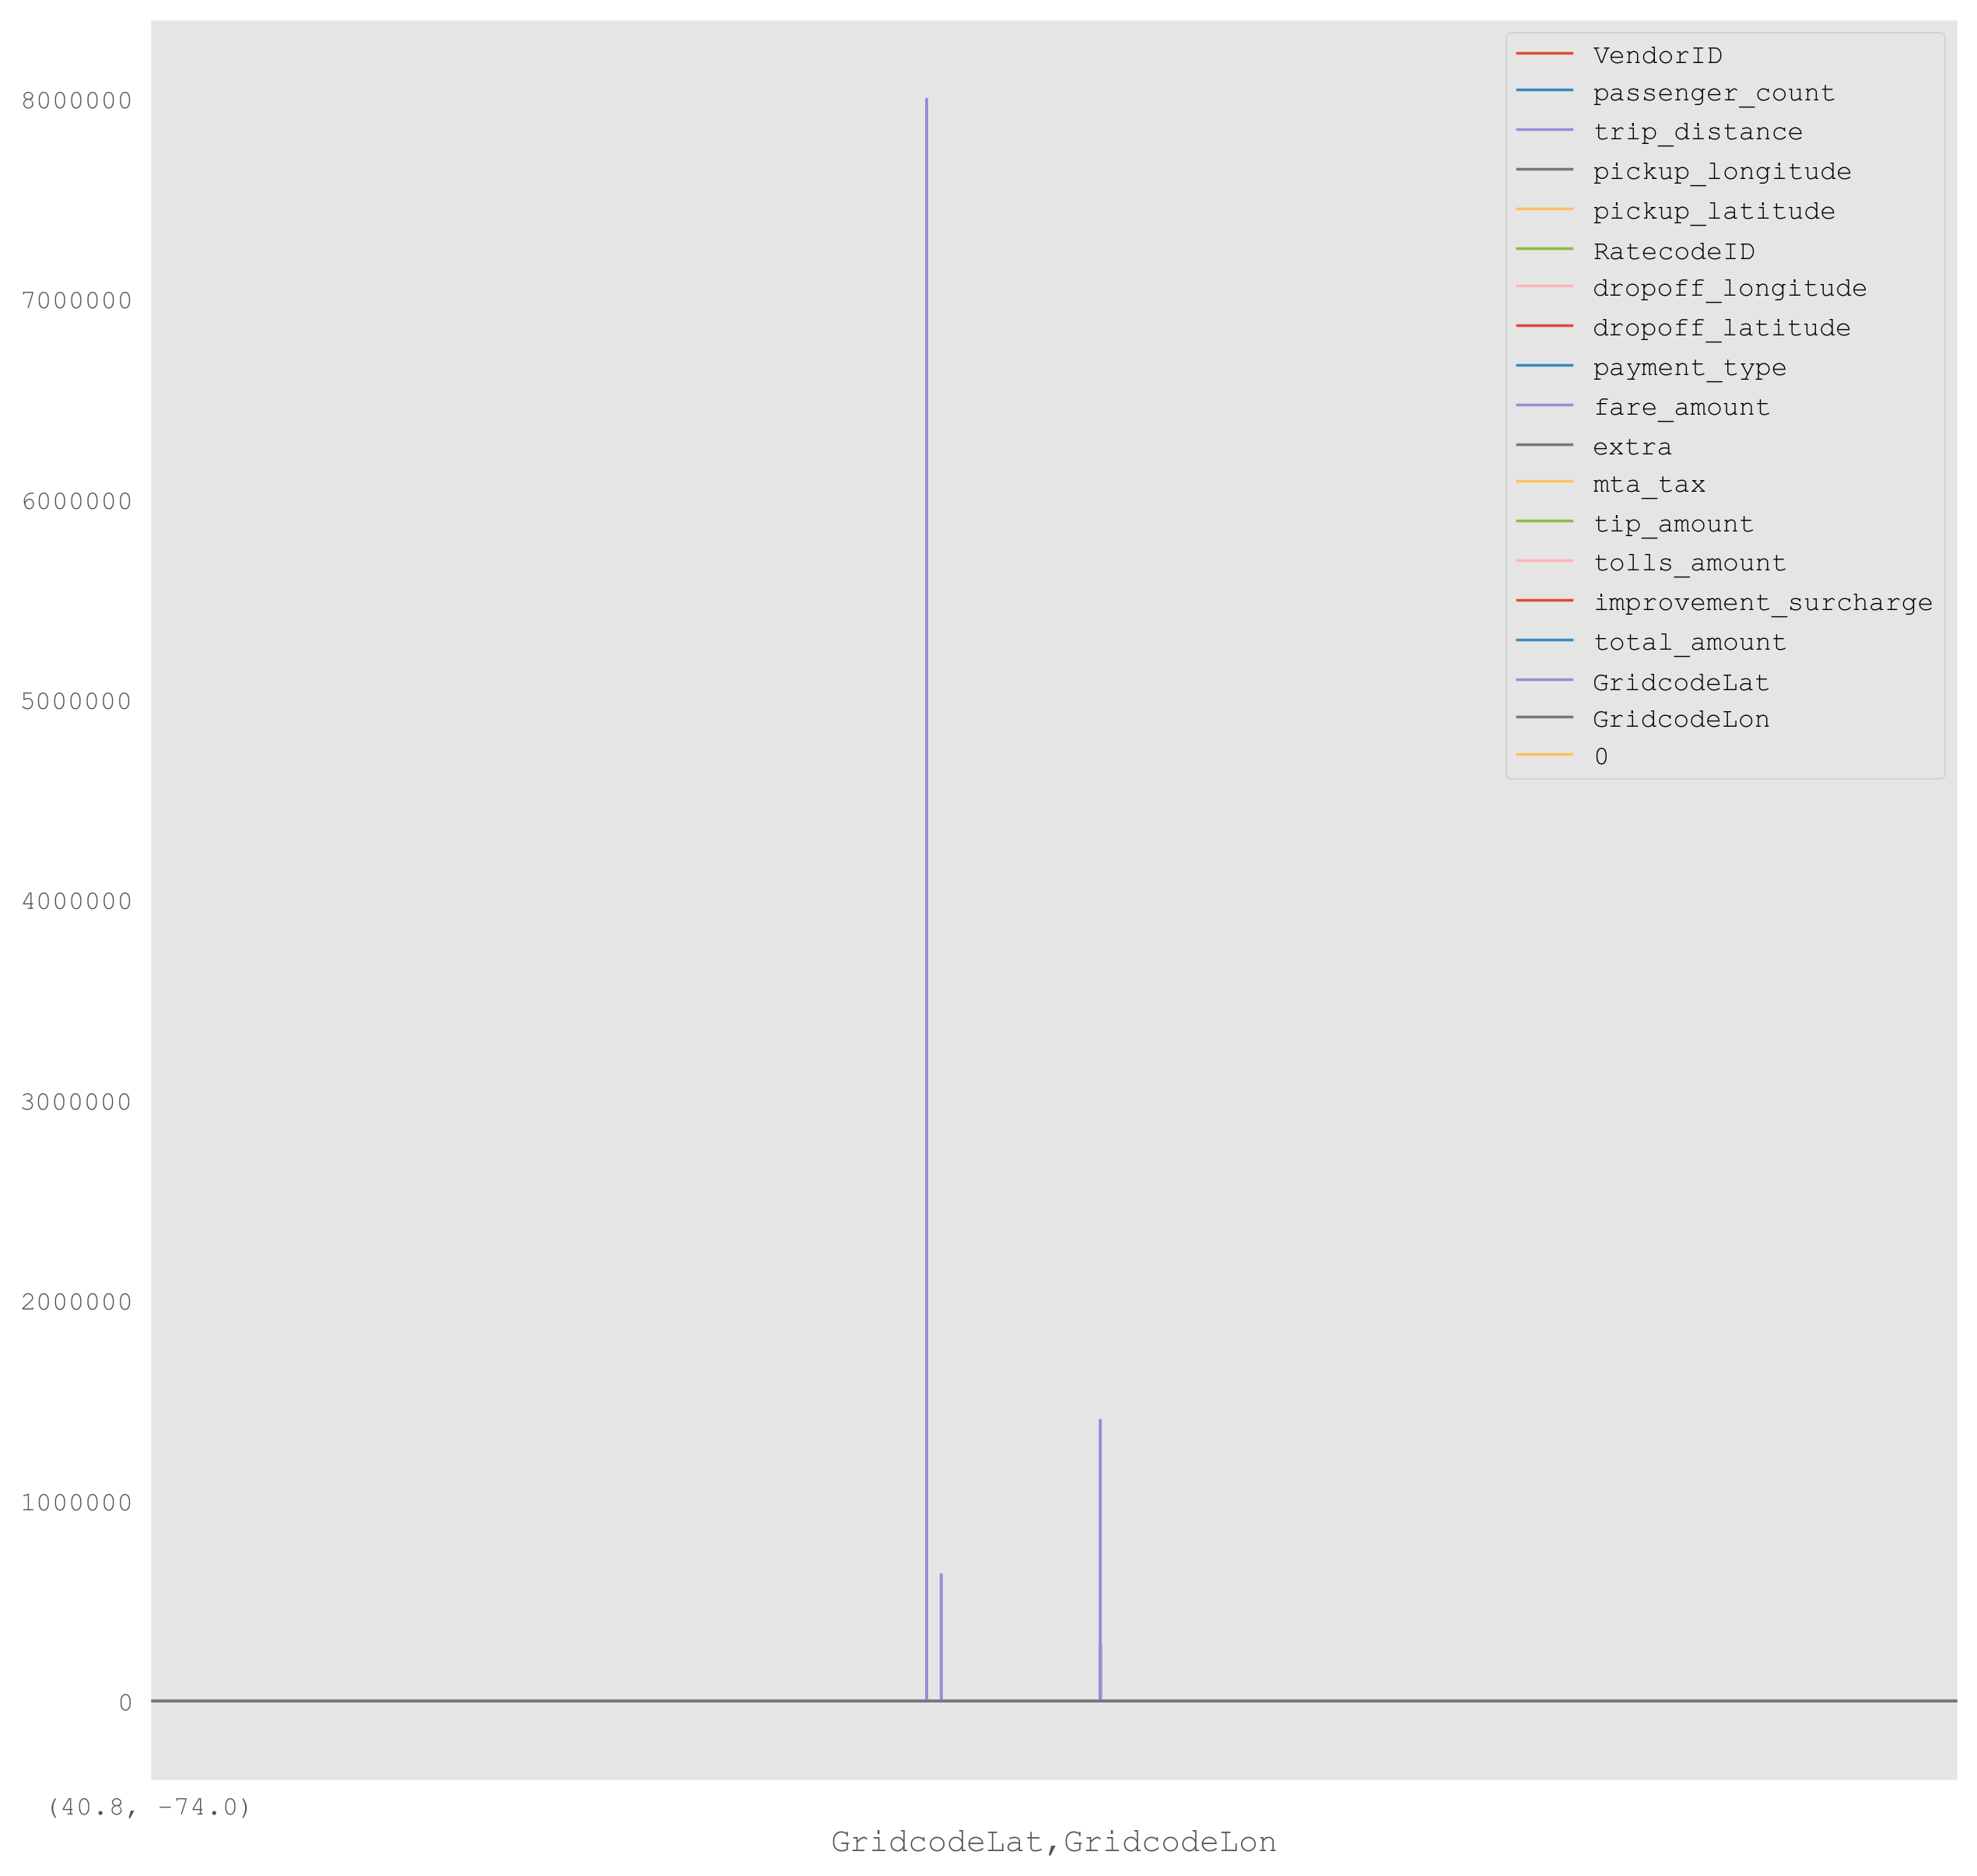

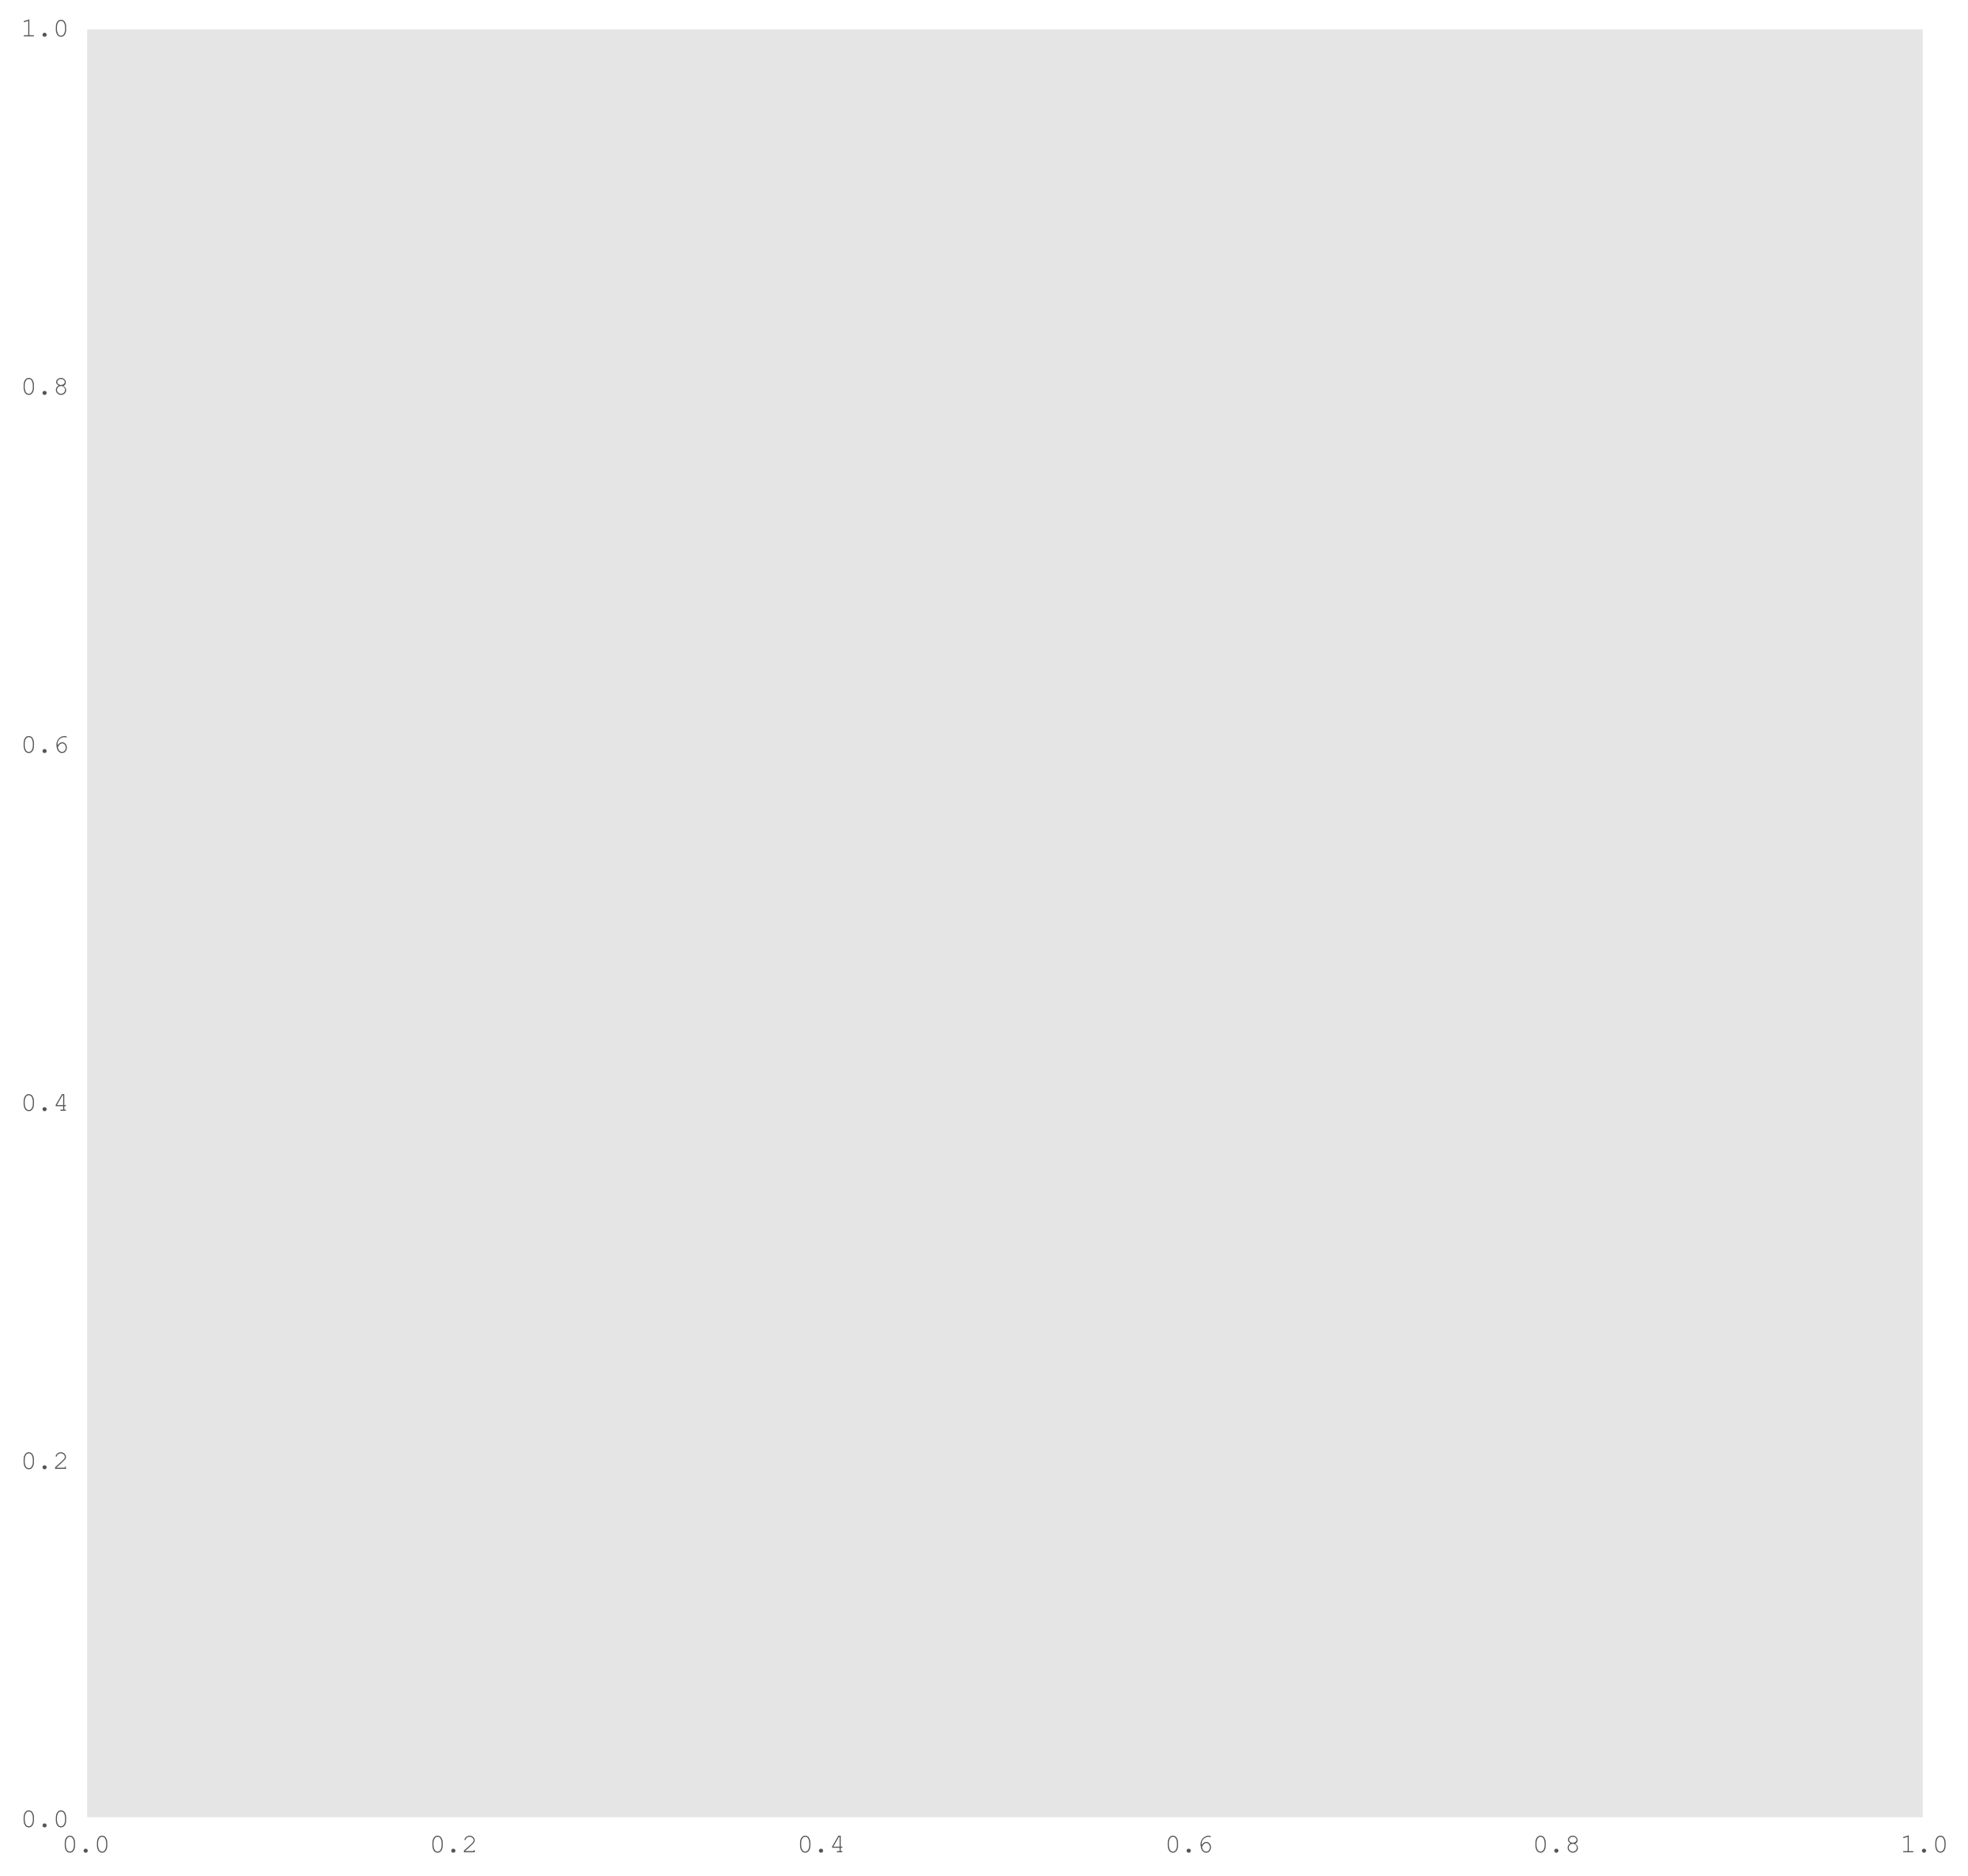

In [ ]:
#plot the most common pick up locations

#pd.options.display.mpl_style = 'default' #Better Styling 
matplotlib.pyplot.style.use('ggplot')

new_style = {'grid': False} #Grid off  
matplotlib.rc('axes', **new_style)  
from matplotlib import rcParams  
rcParams['figure.figsize'] = (12, 12) #Size of figure  
rcParams['figure.dpi'] = 250

P=df.plot(kind='scatter', x='pickup_longitude', y='pickup_latitude',color='white',xlim=(-74.06,-73.77),ylim=(40.61, 40.91),s=.02,alpha=.6)
ax = df.plot()
Top10BusyPickupLocations.plot(ax=ax)
P=Top10BusyPickupLocations.plot(kind='scatter', x='GridcodeLon', y='GridcodeLat',color='red',xlim=(-74.06,-73.77),ylim=(40.61, 40.91),s=1.0,alpha=.6)

#P.set_axis_bgcolor('black') #Background Color
P.set_facecolor('black') #Background Colour

In [ ]:
#plot pie chart of Top 10 busiest locations


# Add graph data
trace1={'labels': ['1st', '2nd', '3rd', '4th', '5th'],
        'values': [38, 27, 18, 10, 7],
        'type': 'pie',
        'name': 'Starry Night',
        'marker': {'colors': ['rgb(56, 75, 126)',
                              'rgb(18, 36, 37)',
                              'rgb(34, 53, 101)',
                              'rgb(36, 55, 57)',
                              'rgb(6, 4, 4)']},
            'domain': {'x': [0, 1],
                       'y': [.4, 1]},
            'hoverinfo':'label+percent+name',
            'textinfo':'none'
        }

# Add trace data to figure
figure['data'].extend(go.Data([trace1]))

# Edit layout for subplots
figure.layout.yaxis.update({'domain': [0, .30]})
# The graph's yaxis2 MUST BE anchored to the graph's xaxis2 and vice versa
# Update the margins to add a title and see graph x-labels. 
figure.layout.margin.update({'t':75, 'l':50})
figure.layout.update({'title': 'Starry Night'})
# Update the height because adding a graph vertically will interact with
# the plot height calculated for the table
figure.layout.update({'height':800})

# Plot!
py.iplot(figure)

In [ ]:
#classfiy into manhattan, JFK airport, laGuardia

#Q's what percentage are those airport trips
# map the fare disputes/ scrap as not many of these

#find out % of trips paid by cc versus cash

#insights: lots of drop offs to brooklyn, queens, bronx.  less pick ups from these areas.  People get taxi's home rather than to work?
#time of day?, weekend?   And people seem to get picked up from main streets!  (the sex and city iconography of hailing a cab is true!)
#interesting in times of UBER



In [90]:
#plot Distributio`n: Passenger numbers per trip
import numpy as np
import plotly.plotly as py
from plotly.offline import init_notebook_mode, iplot, plot
import plotly.figure_factory as ff
import plotly.graph_objs as go

#peps_per_triprav = peps_per_trip.ravel() 
print(peps_per_trip)


#below ply works, put plotly dist plot not happy
#print(df.shape)
#df = df.replace('[]', np.nan)#Soln (a) replace all elements that have any empty value with NaN values
#df=df.dropna()     #Soln (b) drop all rows that have any NaN values
#print(df.shape)
peps_per_trip=df.loc[:, df.columns.str.match('passenger_count')].values
hist_data = [peps_per_trip]
group_labels = ['distplot']
#plt.plot(peps_per_trip)
#plt.show()

fig = ff.create_distplot(hist_data, group_labels)

fig['layout'].update(title='Distribution: Passenger numbers per trip')
py.iplot(fig, filename='DistplotPepsPerTrip')

[[2]
 [5]
 [1]
 ..., 
 [1]
 [1]
 [1]]


C:\Users\elmaog\AppData\Local\Continuum\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2487: RuntimeWarning:

Degrees of freedom <= 0 for slice

C:\Users\elmaog\AppData\Local\Continuum\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2496: RuntimeWarning:

divide by zero encountered in double_scalars

C:\Users\elmaog\AppData\Local\Continuum\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2496: RuntimeWarning:

invalid value encountered in multiply



ValueError: array must not contain infs or NaNs

In [27]:
#import plotly
#plotly.tools.set_credentials_file(username='eosg', api_key='AmlsmkQM0FkVbEPtlQSf')